# Tamaño de la muestra para proporciones
1. Cálculo por formulas de aproximación normal
###### https://www.chreinvent.com/recursos/tama%C3%B1o-de-la-muestra
2. Cálculo por statsmodels.stats.proportion
###### https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.samplesize_confint_proportion.html#statsmodels.stats.proportion.samplesize_confint_proportion-parameters

## Tamaños de muestra para estudiar el uso del correo electrónico y el whatssap
1. Se analiza el tamaño de la muestra para un estudio sobr el el uso del correo electronico hecho en 1997.
2. Se analiza el tamaño de la muestra para un estudio sobre el uso del whatssap hecho en 2024.

### 1. Correo electrónico
+ En 1997, un sociólogo  determino que el porcentaje de hogares en Estados Unidos que utilizaban el correo electrónico. era 17% aprosimadamente. 
    + ¿Cuántos hogares deben encuestarse para tener una confianza del 95% de que el porcentaje muestral es erróneo por no más de 4 puntos porcentuales?

        + a. Utilice el siguiente resultado de un estudio pionero: en 1997, el 16.9% de los hogares estadounidenses usaban correo electrónico
            + (según datos de The World Almanac and Book of Facts).
        + b. Suponga que no tenemos información previa que sugiera un posible valor de pˆ.

In [2]:
# Tamaños de muestra con cáculos por fórmula
from math import ceil

# Caso a: Con información previa
p_hat_a = 0.169
Z = 1.96
E = 0.04
n_a = (Z**2 * p_hat_a * (1 - p_hat_a)) / E**2
n_a = ceil(n_a)

# Caso b: Sin información previa
p_hat_b = 0.5
n_b = (Z**2 * p_hat_b * (1 - p_hat_b)) / E**2
n_b = ceil(n_b)

print("Calculos del tamño de la muestra hechos con formula en base a distribución normal:")
print(f"Tamaño de muestra necesario con información previa (p=0.169): {n_a}")
print(f"Tamaño de muestra necesario sin información previa (p=0.5): {n_b}")


Calculos del tamño de la muestra hechos con formula en base a distribución normal:
Tamaño de muestra necesario con información previa (p=0.169): 338
Tamaño de muestra necesario sin información previa (p=0.5): 601


In [3]:
# Tamaños de muestra con statsmodels
import statsmodels.stats.proportion as prop
import math

# Parámetros comunes
alpha = 0.05  # Nivel de significancia
E = 0.04  # Margen de error


# Caso a: Con información previa
p_hat_a = 0.169
n_a = prop.samplesize_confint_proportion(p_hat_a, E, alpha=0.05, method='normal')
n_a = ceil(n_a)

# Caso b: Sin información previa
p_hat_b = 0.5
n_b = prop.samplesize_confint_proportion(p_hat_b, E, alpha=0.05, method='normal')
n_b = math.ceil(n_b)

print("Calculos del tamño de la muestra hechos con statsmodels.stats.proportion en base a distribución normal:")
print(f"Tamaño de muestra necesario con información previa (p=0.169): {n_a}")
print(f"Tamaño de muestra necesario sin información previa (p=0.5): {n_b}")



Calculos del tamño de la muestra hechos con statsmodels.stats.proportion en base a distribución normal:
Tamaño de muestra necesario con información previa (p=0.169): 338
Tamaño de muestra necesario sin información previa (p=0.5): 601


**Interpretación**
+ Tamaño de muestra necesario con información previa (p=0.169): 544 hogares deben encuestarse para obtener un intervalo de confianza del 95% con un margen de error de ±4 puntos porcentuales.
+ Tamaño de muestra necesario sin información previa (p=0.5): 601 hogares deben encuestarse bajo las mismas condiciones, asumiendo la proporción más conservadora (0.5).
+ Estos tamaños de muestra garantizan que la estimación de la proporción de hogares que usan correo electrónico tendrá un error máximo de ±4 puntos porcentuales con un 95% de confianza.

### 2. Whatssap
+ Para realizar un análisis similar al del correo electrónico en 1997, pero enfocado en el uso de WhatsApp en la actualidad, podemos utilizar los datos recientes disponibles. 
+ En 2024, se estima que WhatsApp tiene 3.031 mil millones de usuarios activos mensualmente, lo que representa alrededor del 52% de los usuarios de Internet a nivel global​    
    + (What&#039;s The Big Data?)​​ (BankMyCell)​.

+ Ahora, procederemos a calcular el tamaño de muestra necesario para tener un 95% de confianza 
    + en que el porcentaje muestral no se desvía más de 4 puntos porcentuales del porcentaje real de usuarios que utilizan WhatsApp.
    + como varía el porcentaje si quermos mayor o menot margen de error que un 4%.

In [7]:
# Tamaño de la muestra con intervalo de confianza del 95% de que el margen de error es 4%
import statsmodels.stats.proportion as smp

# Parámetros del problema
p_hat = 0.52  # Proporción estimada de usuarios de WhatsApp
E = 0.04  # Margen de error
alpha = 0.05  # Nivel de significancia

# Cálculo del tamaño de muestra necesario
n = smp.samplesize_confint_proportion(proportion=p_hat, half_length=E, alpha=alpha)
n = int(n)  # Redondeo al entero más cercano

print(f"Tamaño de muestra necesario: {n} para un intervalo del confianza alpha {alpha} y un margen de error E {E}")


Tamaño de muestra necesario: 599 para un intervalo del confianza alpha 0.05 y un margen de error E 0.04


Grafico del tamaño de la muestra en función del margen de error deseado.

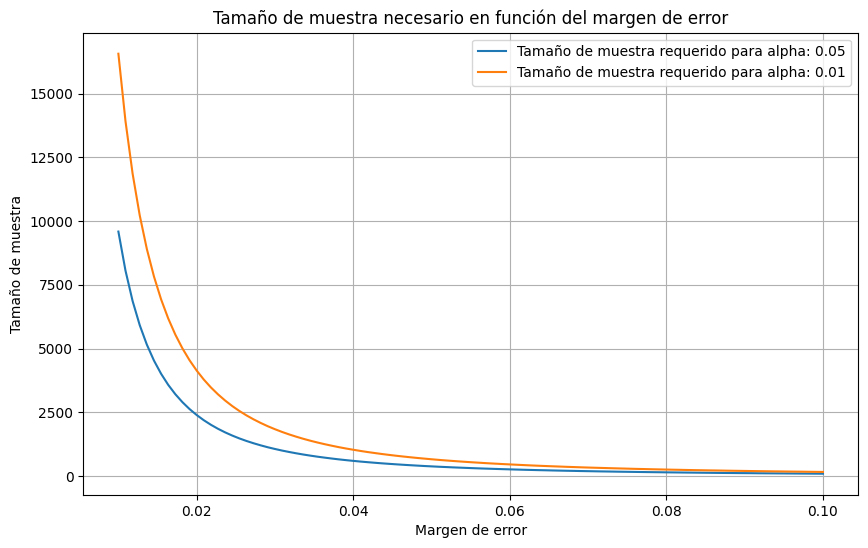

In [11]:
# Grafico del tamaño de la muestra en funcón del margen de error deseado para un IC del 95%
import matplotlib.pyplot as plt
import numpy as np

# Parámetros de la gráfica
E_values = np.linspace(0.01, 0.1, 100)
alpha05 = 0.05
alpha95 = 0.01
n_values05 = [int(smp.samplesize_confint_proportion(proportion=p_hat, half_length=E, alpha=alpha05)) for E in E_values]
n_values95 = [int(smp.samplesize_confint_proportion(proportion=p_hat, half_length=E, alpha=alpha95)) for E in E_values]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(E_values, n_values05, label=f'Tamaño de muestra requerido para alpha: {alpha05}')
plt.plot(E_values, n_values95, label=f'Tamaño de muestra requerido para alpha: {alpha95}')
plt.xlabel('Margen de error')
plt.ylabel('Tamaño de muestra')
plt.title('Tamaño de muestra necesario en función del margen de error')
plt.legend()
plt.grid(True)
plt.show()


**Interpretación**
1. Margen de Error y Tamaño de Muestra: A medida que el margen de error disminuye, el tamaño de muestra necesario aumenta considerablemente. 
+ Esto se debe a que una mayor precisión (menor margen de error) requiere una mayor cantidad de datos para asegurar que el estimado sea confiable.
+ La relación no es lineal; conforme el margen de error se hace muy pequeño (por ejemplo, menos del 1%), el tamaño de muestra requerido aumenta de manera exponencial.

2. Comparación entre diferentes niveles de confianza: Para un nivel de confianza del 95% (alpha=0.05), 
    + el tamaño de muestra es menor comparado con un nivel de confianza del 99% (alpha=0.01).
+ Esto es intuitivo, ya que un mayor nivel de confianza implica que queremos estar más seguros
    + de que el intervalo de confianza contiene el parámetro poblacional verdadero, lo cual requiere una muestra más grande.

+ Comparar ambos niveles de confianza en diferentes márgenes de error puede proporcionar una visión clara de cómo influye el nivel de confianza en el tamaño de la muestra.
+ Los puntos en los que ambas curvas se muestran más divergentes resaltan las áreas donde el incremento en la necesidad de tamaño de muestra es más pronunciado.

**Conclusión:**
+ El análisis y la gráfica proporcionan una herramienta valiosa para entender cómo el tamaño de muestra necesario cambia con el margen de error y el nivel de confianza. 
+ Esto es fundamental en la planificación de estudios y encuestas, permitiendo a los investigadores asegurarse de que su muestra sea lo suficientemente grande
    +  como para proporcionar resultados confiables y precisos.